# Kelvin Wake Image Analysis

Below are some brief expressions that generate images useful for the analysis of Kelvin wake patterns.

In [4]:
from challenging_kelvin import calculate_wake, phi_in, phi_in2
import matplotlib.pyplot as plt
import numpy as np
import cPickle
plt.rcParams['image.cmap'] = 'jet'

The following cell sets up some of the basic information needed for these computations. The following local variables are initialized:

- delta - The base resolution in k-space 
- lambd - The lambda value (analagous to the viscosity of the fluid)
- kmaxs - An array of cutoff kmax values for the Fourier integral calculations
- delts - The resolution for each value of kmax. Generally, higher resolution is needed at lower values of kmax
- bounds - Cutoff standard deviations for image displaying (see below)

All of the local variables are fairly self explanatory, except for bounds. The bounds variable exists because normally, the wake pattern oscillates rapidly in magnitude near the source. The plot color gradient is stretched over a large range of values, which makes it hard to determine behavior far from the source in the resulting images. Because of this, all values that are above or below certain cutoff points are ignored when plotting the wake pattern. Each entry in bounds is equal to the number of standard deviations from zero desired from the cutoff value. The standard deviation approach was chosen because the large scale wake behavior is small to medium oscillations around zero. Ignoring oscillations greater than 2 standard deviations in the case of kmax = 16, for example, makes the large scale behavior of the wake more clear.

In [6]:
delta = 0.03125
lambd = 0.002
kmaxs = [1, 1.25, 1.5, 1.75, 2, 4, 8, 16, 32, 64]
delts = np.ones(len(kmaxs)) * delta
bounds = [100, 100, 100, 100, 100, 4, 2.5, 1.5, 1, 1]

def generate_wake_patterns(kmax, dval):
    phis = []
    xs = []
    for km, dv in zip(kmax, dval):
        x, p = calculate_wake(lambd, km, dv, 1)
        xs.append(x)
        phis.append(np.real(p))
        print('kmax=%f done' % km)
    return xs, phis

In [8]:
pickleFile = 'wake_patterns.pickle'
try:
    with open(pickleFile, 'r') as f:
        phis, xvals, kmaxs, delts, bounds = cPickle.load(f)
    print('Loaded from Pickle')
except:
    print('Generating wake patterns')
    xvals, phis = generate_wake_patterns(kmaxs, delts)
    with open(pickleFile, 'w') as f:
        cPickle.dump([phis, xvals, kmaxs, delts, bounds], f)
    print('Saved as pickle')
        
#The plot range for all plots, in case the resolution is different
rpl = xvals[-1][-1]

Loaded from Pickle


In [28]:
def draw_plot(x, phi, kmax, bound):
    '''
    Plots the wake pattern and sets the axis boundaries to ignore the mostly
    flat areas ahead of and far outside the wake.
    
    x - The range of x values
    phi - The wake pattern values
    kmax - The k-space cutoff value
    bound - The cutoff standard deviation for plotting
    '''
    r = x[-1]
    stdev = np.std(phi)
    toshow = phi * (np.abs(phi) < (bound * stdev))
    fig = plt.figure()
    img = plt.imshow(toshow, extent=[-r, r, -r, r], interpolation='gaussian')
    ax = fig.gca()
    ax.set_xlim([-rpl, 0])
    ax.set_ylim([-rpl/2, rpl/2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    fig.suptitle('kmax=%f' % kmax)
    fig.colorbar(img)
    return fig

def draw_kelvin_angle(fig, x, color='blue'):
    '''
    Draws the kelvin wake angle of 2 theta = 39 degrees on top of the figure
    
    fig - The figure to draw on
    x - The range of x values
    '''
    ax = fig.gca()
    y = np.sqrt(x**2.0/8.)
    ax.plot(x, y, color=color)
    ax.plot(x, -y, color=color)
    
def draw_inner_angle(fig, x, kmax, color='red'):
    '''
    Draws the inner wake angle given by arctan(sqrt(kmax - 1) / (2 kmax - 1)
    
    fig - The figure to draw on
    x - The range of x values
    kmax - The k-space cutoff value
    '''
    ax = fig.gca()
    slope = np.sqrt(kmax - 1.) / (2. * kmax - 1.)
    y = slope * x
    ax.plot(x, y, color=color)
    ax.plot(x, -y, color=color)

def draw_parametric_wake(fig, phase, nmax, t, color='red'):
    '''
    Draw the parametric form of the Kelvin wake over the figure
    
    fig - The figure to draw on
    phase - The overall phase term for the wake pattern
    nmax - The number of wakes to draw
    t - The values of t to plot parametrically
    '''
    ax = fig.gca()
    t32 = np.power(t, 1.5)
    xtterm = (2*t - 1) / t32
    ytterm = np.sqrt(t - 1) / t32
    for n in range(1, nmax+1):
        t32 = np.power(t, 1.5)
        xt = -np.pi * (2 * n + 1 + phase) * xtterm
        yt = -np.pi * (2 * n + 1 + phase) * ytterm
        ax.plot(xt, yt, color=color)
        ax.plot(xt, -yt, color=color)

l=0.002000_kmax=1.000000_step=0.031250


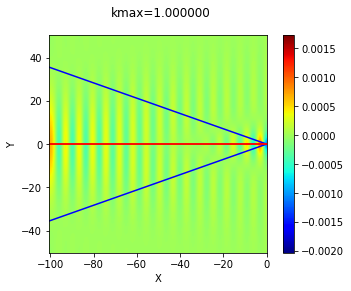

l=0.002000_kmax=1.250000_step=0.031250


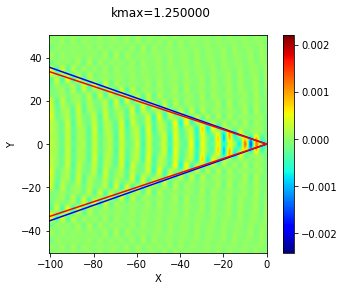

l=0.002000_kmax=1.500000_step=0.031250


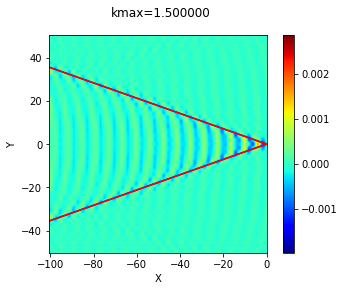

l=0.002000_kmax=1.750000_step=0.031250


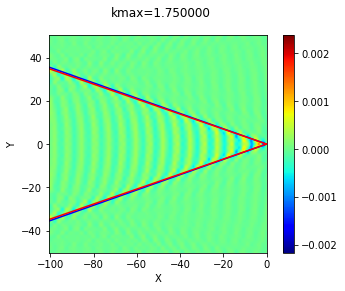

l=0.002000_kmax=2.000000_step=0.031250


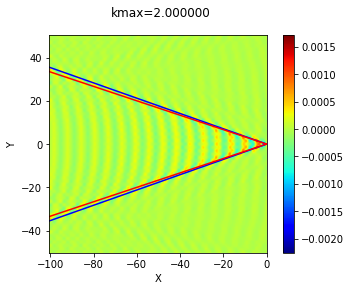

l=0.002000_kmax=4.000000_step=0.031250


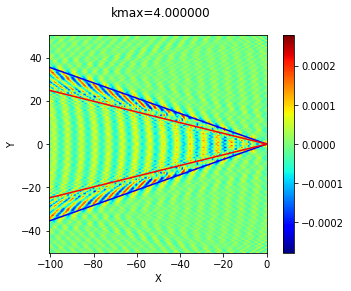

l=0.002000_kmax=8.000000_step=0.031250


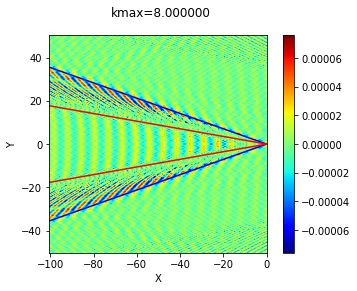

l=0.002000_kmax=16.000000_step=0.031250


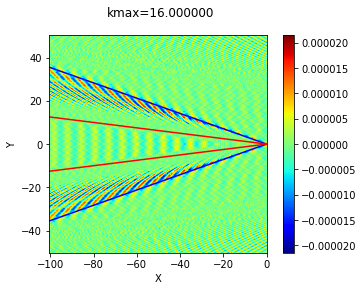

l=0.002000_kmax=32.000000_step=0.031250


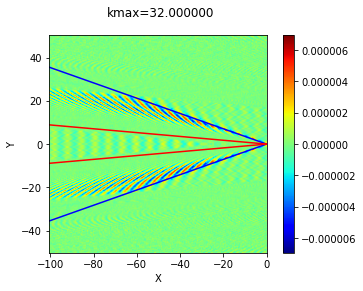

l=0.002000_kmax=64.000000_step=0.031250


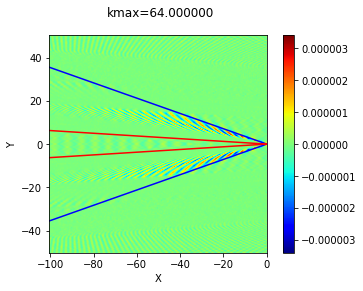

In [31]:
#Create plots for all of our wake patterns
for ind in range(0, len(phis)):
    phi = phis[ind]
    x = xvals[ind]
    kmax = kmaxs[ind]
    bound = bounds[ind]
    fig = draw_plot(x, phi, kmax, bound)
    draw_kelvin_angle(fig, x)
    draw_inner_angle(fig, x, kmax)
    filename='l=%f_kmax=%f_step=%f' % (lambd, kmaxs[ind], delts[ind])
    print(filename)
    fig.savefig('/home/jcolen/Documents/kelvinmach/challenging_kelvin/pics/%s.png' % filename)
    #fig.savefig('C:\Users\Jonathan\Documents\School\Kolomeisky\challenging_kelvin\pics\%s.png' % filename)
    plt.show()

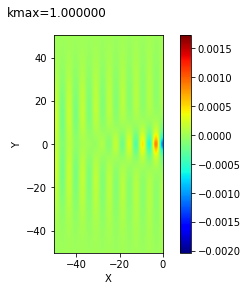

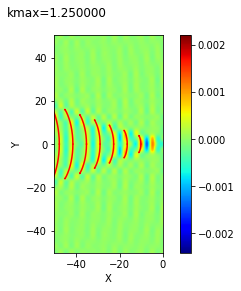

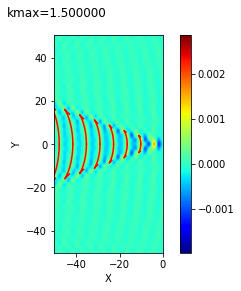

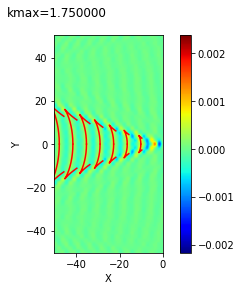

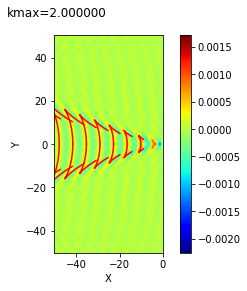

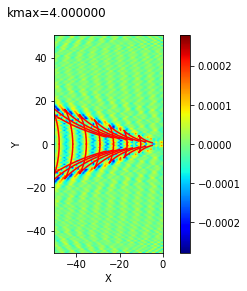

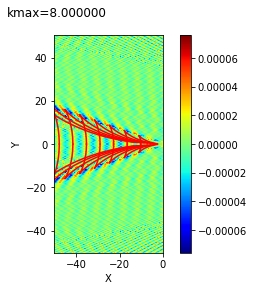

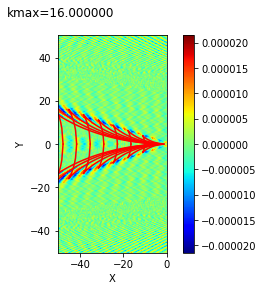

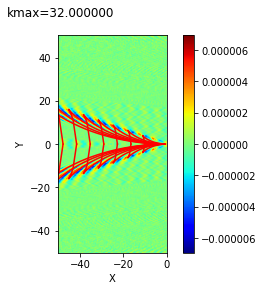

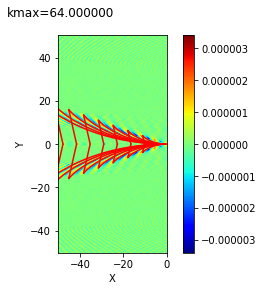

In [47]:
phase = 60.5/np.pi - 19.0

for ind in range(0, len(phis)):
    t = np.linspace(1, kmaxs[ind]**2., 10000)
    fig = draw_plot(xvals[ind], phis[ind], kmaxs[ind], bounds[ind])
    draw_parametric_wake(fig, phase, 8, t)
    fig.gca().set_xlim(-rpl/2, 0)
    plt.show()

# Forward and Back Fourier Transforms

The next few cells are mainly to test the validity of the computation method. In the first cell, the wake pattern is inverse Fourier transformed back and compared to the source term in k-space. In the second cell, a function whose Fourier transform can be expressed analytically is considered. Specifically, this is the response to a source set a distance above the x-y plane. The function n(r) and it's Fourier Transform n(q) are compared to F^(-1)[n(q)] and F[n(r)] respectively, to ensure the method works.

((255.95751965484692+316.33058235985823j), (-237.24642066394676-146.16464462154886j))


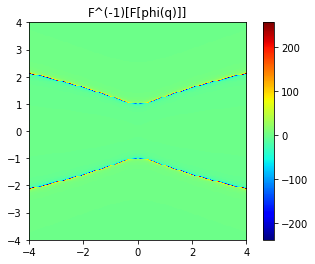

((255.95751965497345+316.33058235926961j), (-237.24642066406409-146.16464462178172j))


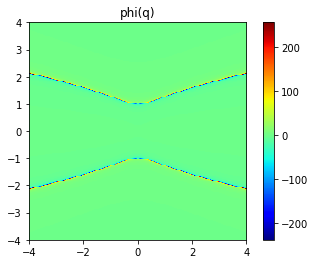

In [21]:
#Reverse fourier transform
ind = 5 #kmax = 4
phii = phis[ind]
xi = xvals[ind]
dk = delts[ind]
n = len(xi)
m = (n-1) / 2
dx = xi[-1] - xi[-2]
ks = np.pi / (dx * m) * np.arange(-m, m+1, 1)
n += 1
phi_grid = np.roll(phii, -m, axis=0)
phi_grid = np.roll(phi_grid, -m, axis=1)
fPhi = np.fft.fft2(phi_grid / (dk * dk))
fPhi = np.roll(fPhi, m, axis=1)
fPhi = np.roll(fPhi, m, axis=0)
fPhi = np.transpose(fPhi)

plt.figure()
ri = ks[-1]
print(np.max(fPhi), np.min(fPhi))
plt.title('F^(-1)[F[phi(q)]]')
plt.imshow(np.real(fPhi), extent=[-ri, ri, -ri, ri])
plt.colorbar()
plt.show()

plt.figure()
phi2 = phi_in2(ks[:, None], ks[None, :], lambd)
plt.title('phi(q)')
print(np.max(phi2), np.min(phi2))
plt.imshow(np.real(phi2), extent=[-ri, ri, -ri, ri])
plt.colorbar()
plt.show()

(2099200, 0)
(2100224, 4202499)


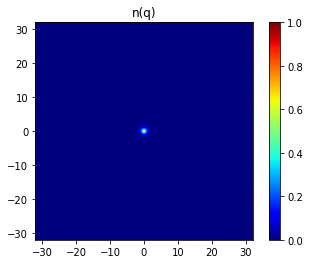

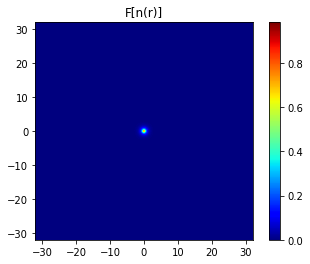

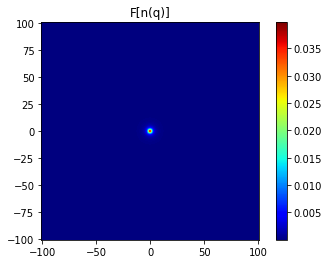

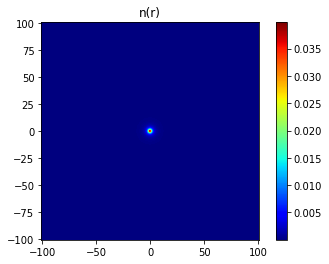

In [22]:
def nextr(r, a=2.0):
    return a / (2 * np.pi * np.power(r**2.0 + a**2.0, 1.5))

def nextq(q, a=2.0):
    return np.exp(-q * a)

def phiin(kx, ky, l, func=nextr):
    k = np.sqrt(kx*kx + ky*ky)
    return func(k)

ind = -2
R = kmaxs[ind]
d = delts[ind]
k = np.arange(-R, R+d, d)
n = len(k)
m = (n - 1) / 2
x = np.pi / (d * m) * np.arange(-m, m+2, 1)
phi_q = phiin(k[:,None], k[None,:], lambd, func=nextq)
phi_r = phiin(x[:,None], x[None,:], lambd, func=nextr)

dx = x[-1] - x[-2]
dk = k[-1] - k[-2]

print(np.argmax(phi_q), np.argmin(phi_q))
print(np.argmax(phi_r), np.argmin(phi_r))

phi_qgrid = np.roll(phi_q, -m, axis=0)
phi_qgrid = np.roll(phi_qgrid, -m, axis=1)
fPhiq = np.fft.ifft2(phi_qgrid) / (dx * dx)
fPhiq = np.roll(fPhiq, m, axis=1)
fPhiq = np.roll(fPhiq, m, axis=0)
fPhiq = np.transpose(fPhiq)

phi_rgrid = np.roll(phi_r, -m, axis=0)
phi_rgrid = np.roll(phi_rgrid, -m, axis=1)
fPhir = np.fft.fft2(phi_rgrid) * dx * dx
fPhir = np.roll(fPhir, m, axis=1)
fPhir = np.roll(fPhir, m, axis=0)
fPhir = np.transpose(fPhir)

x0 = x[-1]
k0 = k[-1]
plt.figure()
plt.title('n(q)')
plt.imshow(np.real(phi_q), extent=[-k0, k0, -k0, k0])
plt.colorbar()
plt.figure()
plt.title('F[n(r)]')
plt.imshow(np.real(fPhir), extent=[-k0, k0, -k0, k0])
plt.colorbar()
plt.figure()
plt.title('F[n(q)]')
plt.imshow(np.real(fPhiq), extent=[-x0, x0, -x0, x0])
plt.colorbar()
plt.figure()
plt.title('n(r)')
plt.imshow(np.real(phi_r), extent=[-x0, x0, -x0, x0])
plt.colorbar()

plt.show()